# Step 1:

In [1]:
import os
import pandas as pd

# Load the dataset and display first few rows
df=pd.read_csv("data/fifa21 raw data v2.csv")
df.head()

/var/folders/kc/mhm2kh_d3hsgh6c30kfnwmhw0000gn/T/ipykernel_35596/3264464816.py:4: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("data/fifa21 raw data v2.csv")


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


# Step 2:

In [2]:
# Convert Height to inches 
def convert_height(height):
    if isinstance(height, str):
        if "'" in height:
            feet, inches = height.split("'")
            return int(feet) * 12 + int(inches.replace('"', '').strip())
        elif "cm" in height:
            return int(height.replace('cm', '').strip()) * 0.393701
    return None

# Convert Weight to numerical (in lbs)
def convert_weight(weight):
    if isinstance(weight, str):
        if "lbs" in weight:
            return int(weight.replace('lbs', '').strip())
        elif "kg" in weight:
            return int(weight.replace('kg', '').strip()) * 2.20462
    return None

# Apply the functions to clean the 'Height' and 'Weight' columns
df['Height'] = df['Height'].apply(convert_height)
df['Weight'] = df['Weight'].apply(convert_weight)

# Display the cleaned data for Height and Weight columns
df[['Height', 'Weight']].head()


,Height,Weight
0,66.929170,158.73264
1,73.622087,182.98346
2,74.015788,191.80194
3,71.259881,154.32340
4,68.897675,149.91416


### Cleaning `Height` and `Weight` Columns
The `Height` column contains a mix of feet/inches and centimeter formats, while the `Weight` column contains pounds and kilograms. To standardize these measurements:
- Heights were converted to inches.
- Weights were converted to pounds.

This ensures consistency across the dataset.


# Step 3:

In [3]:
# Remove newline characters from all string columns
df = df.applymap(lambda x: x.replace('\n', '') if isinstance(x, str) else x)

# Verify the removal of newline characters
df.head()


/var/folders/kc/mhm2kh_d3hsgh6c30kfnwmhw0000gn/T/ipykernel_35596/2527334713.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('\n', '') if isinstance(x, str) else x)


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


### Removing Unnecessary Newlines
Some columns contained newline characters, which are not meaningful for analysis. I removed these characters from all string columns to clean up the dataset.


# Step 4:


In [4]:
# Helper function to convert money strings to numeric values
def convert_money(value):
    if isinstance(value, str):
        # Remove the currency symbol and convert abbreviations
        value = value.replace('€', '').replace('M', '000000').replace('K', '000')
        try:
            return float(value)
        except ValueError:
            return None  # In case of non-convertible strings
    return value

# Apply conversion function to 'Value', 'Wage', and 'Release Clause' columns
df['Value'] = df['Value'].apply(convert_money)
df['Wage'] = df['Wage'].apply(convert_money)
df['Release Clause'] = df['Release Clause'].apply(convert_money)

# Display cleaned monetary columns to verify
df[['Value', 'Wage', 'Release Clause']].head()


,Value,Wage,Release Clause
0,103.5,560000.0,138.4
1,63000000.0,220000.0,75.9
2,120000000.0,125000.0,159.4
3,129000000.0,370000.0,161000000.0
4,132000000.0,270000.0,166.5


### Converting `Value`, `Wage`, and `Release Clause` to Numeric
The `Value`, `Wage`, and `Release Clause` columns contained currency symbols and abbreviations ("M" for millions, "K" for thousands). I converted these to pure numeric values by:
- Removing the "€" symbol.
- Expanding "M" to represent millions and "K" to represent thousands.

This standardization allows for straightforward analysis of player financial information.


In [8]:
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

 
# step 5:


In [7]:
# Convert star-rated columns to numeric (replace '★' with empty string and convert to float)
star_columns = ['W/F', 'SM', 'IR']
for col in star_columns:
    df[col] = df[col].replace({'★': ''}, regex=True).astype(float)

# Display the cleaned star-rating columns
df[star_columns].head()


,W/F,SM,IR
0,4.0,4.0,5.0
1,4.0,5.0,5.0
2,3.0,1.0,3.0
3,5.0,4.0,4.0
4,5.0,5.0,5.0


### Cleaning Columns
Certain columns, like 'W/F', 'SM', 'IR' use star symbols (★) to represent ratings. I removed these characters and converted the columns to numeric format to make the ratings easily interpretable for analysis.



step 6

In [9]:
from datetime import datetime

# Convert 'Joined' to datetime format
df['Joined'] = pd.to_datetime(df['Joined'], errors='coerce')

# Calculate tenure in years
current_year = datetime.now().year
df['Years_at_Club'] = current_year - df['Joined'].dt.year

# Filter players with over 10 years at their current club
long_tenure_players = df[df['Years_at_Club'] > 10]

# Display players with more than 10 years at their club
long_tenure_players[['Name', 'Club', 'Joined', 'Years_at_Club']].head()


,Name,Club,Joined,Years_at_Club
0,L. Messi,FC Barcelona,2004-07-01,20
12,Casemiro,Real Madrid,2013-07-11,11
14,M. Neuer,FC Bayern München,2011-07-01,13
15,K. Benzema,Real Madrid,2009-07-09,15
16,Sergio Ramos,Real Madrid,2005-08-01,19


### Calculating Player Tenure with `Joined` Column
The `Joined` column indicates the year each player joined their current club. To calculate tenure:
- I converted the `Joined` column to a datetime format.
- Calculated each player’s tenure by subtracting the joining year from the current year.
- Identified players with more than 10 years at their club.

This calculation provides insights into player loyalty and long-term club affiliations.


STEP 7

In [10]:
# Calculate the value-to-wage ratio
df['Value_to_Wage_Ratio'] = df['Value'] / df['Wage']

# Filter players who have high value but low wage (for example, value > 1 million and wage < 5,000)
high_value_low_wage = df[(df['Value'] > 1000000) & (df['Wage'] < 5000)]

# Display these players
high_value_low_wage[['Name', 'Club', 'Value', 'Wage', 'Value_to_Wage_Ratio']].head()


,Name,Club,Value,Wage,Value_to_Wage_Ratio
346,Ismaily,Shakhtar Donetsk,22000000.0,1000.0,22000.0
373,V. Tsygankov,Dynamo Kyiv,34000000.0,1000.0,34000.0
507,Júnior Moraes,Shakhtar Donetsk,11000000.0,1000.0,11000.0
588,José Sá,Olympiacos CFP,16000000.0,1000.0,16000.0
670,M. Valbuena,Olympiacos CFP,7000000.0,1000.0,7000.0


### Identifying High-Value, Low-Wage Players
To identify players who may be undervalued in terms of wages:
- I calculated a `Value_to_Wage_Ratio` for each player.
- Filtered for players with a high market value (over 1 million) but a low wage (under 5,000).

This analysis helps highlight players who could be valuable investments due to their relatively low wage requirements.


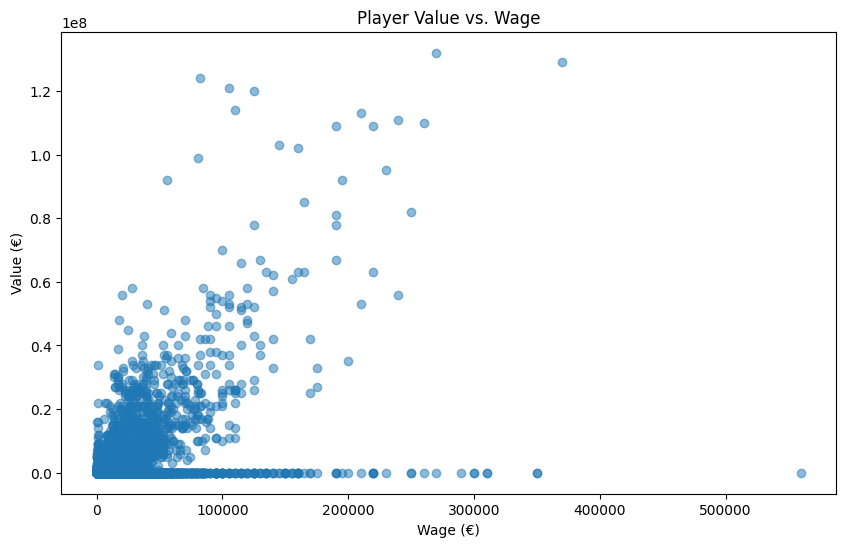

In [11]:
import matplotlib.pyplot as plt

# Scatter plot between Wage and Value
plt.figure(figsize=(10, 6))
plt.scatter(df['Wage'], df['Value'], alpha=0.5)
plt.xlabel('Wage (€)')
plt.ylabel('Value (€)')
plt.title('Player Value vs. Wage')
plt.show()


### Visualizing the Relationship Between `Value` and `Wage`
A scatter plot of `Value` versus `Wage` allows us to visually explore the correlation between player wages and their market value. Points that fall outside expected ranges (e.g., high-value, low-wage players) are highlighted in our analysis.
